In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
santa = pd.read_csv('C:/Users/tan3/ECE720/project_data/gifts.csv')

In [ ]:
santa

In [4]:
santa.head()

,GiftId
0,horse_0
1,horse_1
2,horse_2
3,horse_3
4,horse_4


In [5]:
class Horse():
    def __init__(self,id):
        self.weight = max(0, np.random.normal(5,2,1)[0])
        self.name = 'horse_' + str(id)
class Ball():
    def __init__(self,id):
        self.weight = max(0, 1 + np.random.normal(1,0.3,1)[0])
        self.name = 'ball_' + str(id)

class Bike():
    def __init__(self,id):
        self.weight = max(0, np.random.normal(20,10,1)[0])
        self.name = 'bike_' + str(id)

class Train():
    def __init__(self,id):
        self.weight = max(0, np.random.normal(10,5,1)[0])
        self.name = 'train_' + str(id)
        
class Coal():
    def __init__(self,id):
        self.weight = 47 * np.random.beta(0.5,0.5,1)[0]
        self.name = 'coal_' + str(id)
        
class Book():
    def __init__(self,id):
        self.weight = np.random.chisquare(2,1)[0]
        self.name = "book_" + str(id)
        
class Doll():
    def __init__(self,id):
        self.weight = np.random.gamma(5,1,1)[0]
        self.name = "doll_" + str(id)

class Block():
    def __init__(self,id):
        self.weight = np.random.triangular(5,10,20,1)[0]
        self.name = "blocks_" + str(id)
        
class Gloves():
    def __init__(self,id):
        self.weight = 3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0]
        self.name = "gloves_" + str(id)

In [6]:
#generate with a specific amount of gifts, and show the distribution plots for all gifts 
count = 10000
books = [Book(x) for x in range(count)]
horses = [Horse(x) for x in range(count)]
bikes = [Bike(x) for x in range(count)]
trains = [Train(x) for x in range(count)]
coals = [Coal(x) for x in range(count)]
dolls = [Doll(x) for x in range(count)]
balls = [Ball(x) for x in range(count)]
blocks = [Block(x) for x in range(count)]
gloves = [Gloves(x) for x in range(count)]

Text(0.5, 1.0, 'gloves distribution')

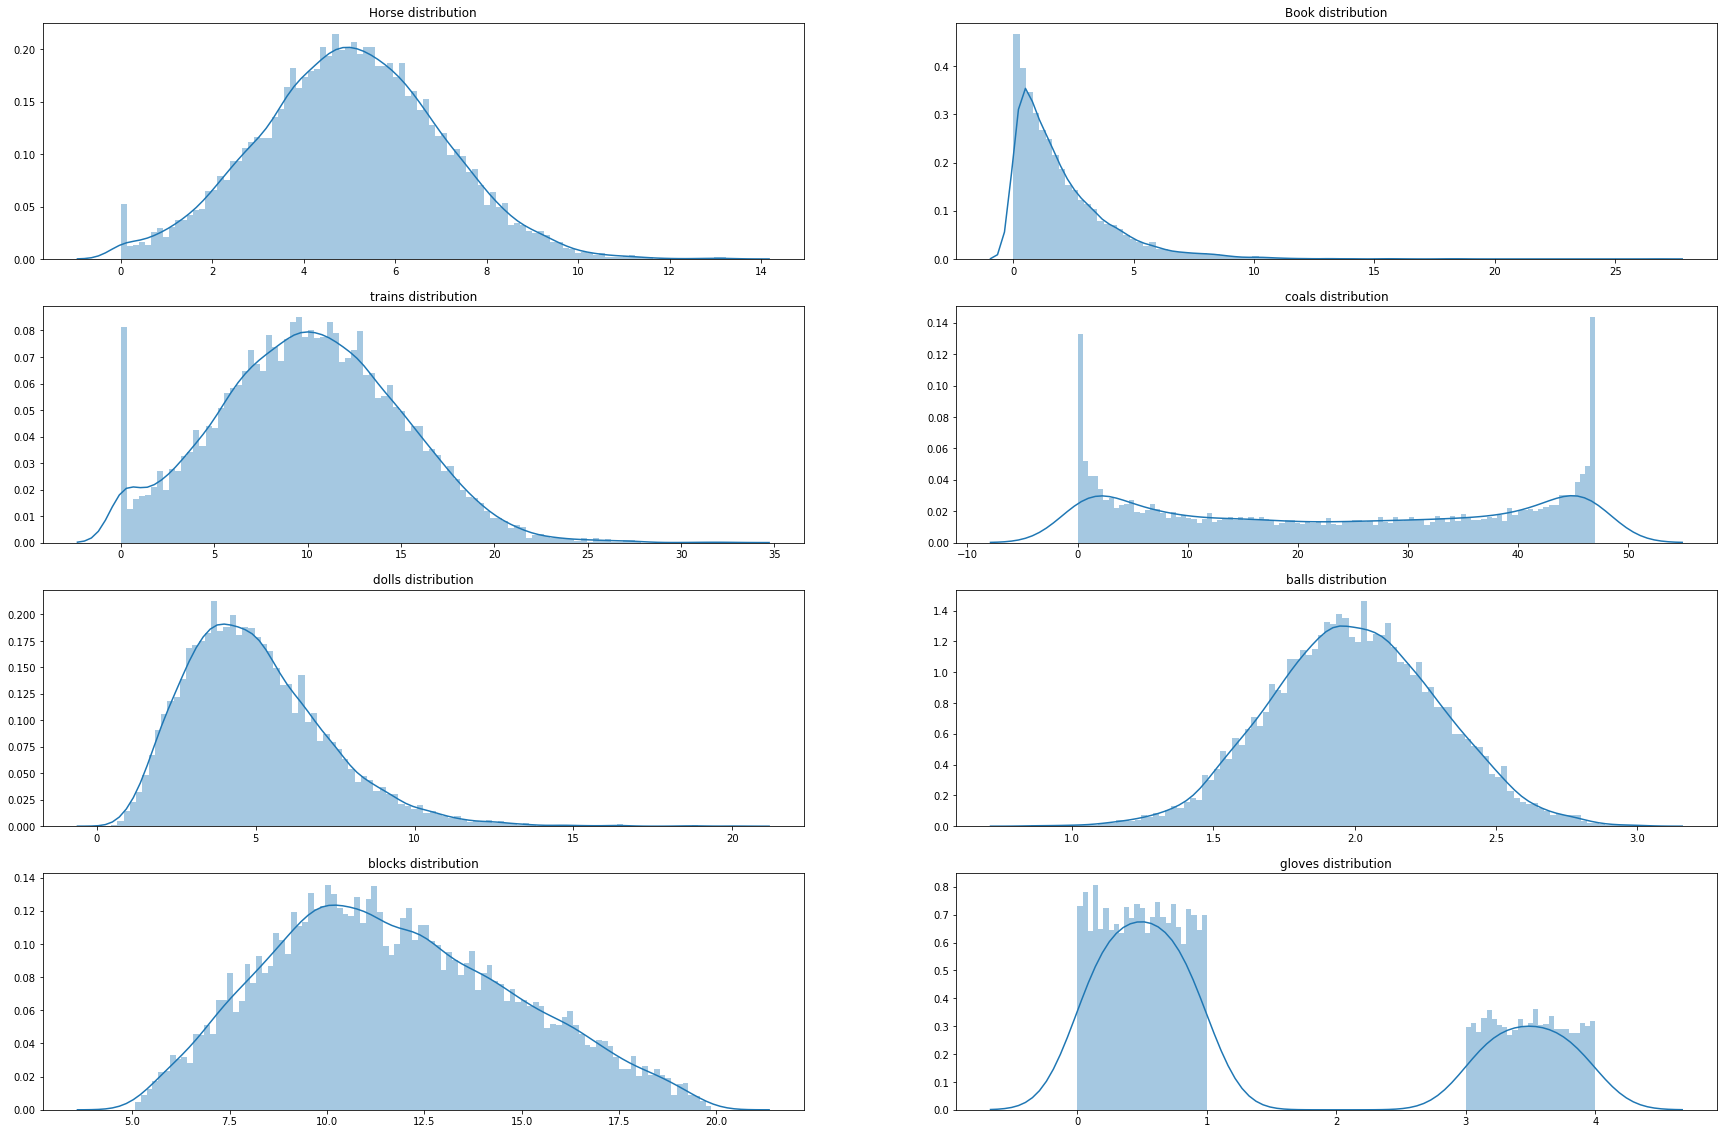

In [7]:
fig,axes=plt.subplots(4,2,figsize =(30,20))
f1  = sns.distplot([horse.weight for horse in horses],bins=100,ax=axes[0][0])
f1.set_title("Horse distribution")



f2 =sns.distplot([book.weight for book in books],bins=100,ax=axes[0][1])
f2.set_title("Book distribution")



f3 = sns.distplot([train.weight for train in trains],bins=100,ax=axes[1][0])
f3.set_title('trains distribution')



f4 = sns.distplot([coal.weight for coal in coals],bins=100,ax=axes[1][1])
f4.set_title('coals distribution')



f5 = sns.distplot([doll.weight for doll in dolls],bins=100,ax=axes[2][0])
f5.set_title('dolls distribution')


f6 = sns.distplot([ball.weight for ball in balls],bins=100,ax=axes[2][1])
f6.set_title('balls distribution')


f7 = sns.distplot([block.weight for block in blocks],bins=100,ax=axes[3][0])
f7.set_title('blocks distribution')



f8 = sns.distplot([glove.weight for glove in gloves],bins=100,ax=axes[3][1])
f8.set_title('gloves distribution')


#### get the distrbution data

In [15]:
horse_stat = pd.DataFrame([horse.weight for horse in horses],columns=['horse']).describe()
book_stat = pd.DataFrame([book.weight for book in books],columns=['book']).describe()
train_stat = pd.DataFrame([train.weight for train in trains],columns=['train']).describe()
doll_stat = pd.DataFrame([doll.weight for doll in dolls],columns=['doll']).describe()
ball_stat = pd.DataFrame([ball.weight for ball in balls],columns=['ball']).describe()
block_stat = pd.DataFrame([block.weight for block in blocks],columns=['block']).describe()
glove_stat = pd.DataFrame([glove.weight for glove in gloves],columns=['glove']).describe()
coal_stat = pd.DataFrame([coal.weight for coal in coals],columns=['coal']).describe()
pd.concat([horse_stat,book_stat,train_stat,doll_stat,ball_stat,glove_stat,coal_stat],axis=1)

,horse,book,train,doll,ball,glove,coal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.017489,2.018715,10.086390,4.997593,2.000417,1.413853,23.493090
std,1.984695,2.002814,4.893483,2.232140,0.299700,1.413269,16.611492
min,0.000000,0.000560,0.000000,0.444822,0.854083,0.000122,0.000005
25%,3.691693,0.581066,6.702510,3.383085,1.796219,0.358819,6.849020
50%,5.013571,1.427348,10.063144,4.694859,1.997318,0.714792,23.507523
75%,6.346763,2.828133,13.414111,6.286271,2.205871,3.178900,40.168126
max,13.230381,26.833546,32.387605,20.100064,3.015787,3.999992,47.000000


In [9]:
#seperate the gift type and gift 
santa_list = [(gift.split('_')[0], gift.split('_')[1]) for gift in santa['GiftId']]
santa_element = pd.DataFrame(santa_list,columns=['Gift','Id'])

In [13]:
santa_element.head()
len(santa_element.index)

7166

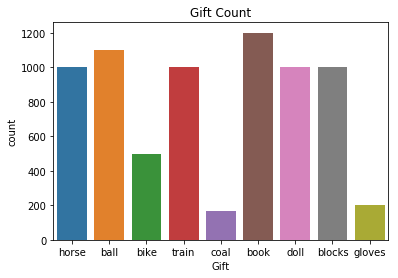

In [11]:
sns.countplot(x ='Gift', data=santa_element)
plt.title('Gift Count')
plt.show()

In [28]:
#Monte Carlo Solution 
class Monte_Carlo_Solver():
    def __init__(self, sample_num = 100,probability=0.1):
        # toys distribution as a dictionary(for easy accessing and generate data) with lambda expression 
        self.toys = {
                "horse":  { "sample": lambda: max(0, np.random.normal(5,2,1)[0])},# make sure not to be smaller than 0 
                "ball":   { "sample": lambda: max(0, 1 + np.random.normal(1,0.3,1)[0])},
                "bike":   { "sample": lambda: max(0, np.random.normal(20,10,1)[0])},
                "train":  { "sample": lambda: max(0, np.random.normal(10,5,1)[0])},
                "coal":   { "sample": lambda: 47 * np.random.beta(0.5,0.5,1)[0]},
                "book":   { "sample": lambda: np.random.chisquare(2,1)[0]},
                "doll":   { "sample": lambda: np.random.gamma(5,1,1)[0]},
                "blocks": { "sample": lambda: np.random.triangular(5,10,20,1)[0],},
                "gloves": { "sample": lambda: 3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0]},
                };
        self.sample_num = sample_num;
        self.probability = probability;
        self.data = pd.read_csv('C:/Users/tan3/ECE720/project_data/gifts.csv', sep=",")["GiftId"].values
    
    def score_bag(self,bag):
        """
        Evaluate the approximate (expected) weight score for the bag without violating two constraints:
        1. less than 3 items 
        2. over weighted 
        
        return:  bag score
        """
        if len(bag) < 3: #less than 3 item ,zero score
            score = 0.0
        else:
            gift_type = [t.split("_")[0] for t in bag] # get all the gift type 
            samples = []
            for x in range(0, self.sample_num):
                samples.append(sum(list(map(lambda x: self.toys[x]["sample"](), gift_type))))
            over_filled = sum(x > 50 for x in samples) / self.sample_num #  overweighted ratio 
            score = np.mean(samples) * (1.0 - over_filled)
        return score

    def stuff_bag(self,bag, gifts):
        """
        Try to put more gifts in the bag as long as the score increase.
        """
        while True:
            toy = np.random.choice(gifts, 1)
            new_bag = np.append(bag, toy)
            if self.score_bag(bag) > self.score_bag(new_bag):
                break
            else:
                bag = new_bag
                gifts = np.setdiff1d(gifts, toy)
        return bag, gifts
    
    def move_to_bag(self,bag, gifts):
        """
        This function can only be called by random_move method
        put new item to the bag if it can increase the score
        (or still possible with some probability)
        """
        toy = np.random.choice(gifts, 1)
        new_bag = np.append(bag, toy)
        if self.score_bag(new_bag) > self.score_bag(bag) or np.random.random() < self.probability:
            bag = new_bag
            gifts = np.setdiff1d(gifts, toy)
        return bag, gifts
    
    def move_from_bag(self,bag,gifts):
        """
        This function can only be called by random_move method
        remove one item from the bag if it can increase the score
        (or still possible with some probability)
        """
        if len(bag) > 3:
            toy = np.random.choice(bag, 1)
            new_bag = np.setdiff1d(bag, toy)
            if self.score_bag(new_bag) > self.score_bag(bag)or np.random.random() < self.probability:
                bag = new_bag
                gifts = np.append(gifts, toy)
        return bag, gifts
    
    def swap_toys(self,bag,gifts):
        """
        his function can only be called by random_move method
        swap one item in the bag with one random gift out of bag if it can increase the score
        (or still possible with some probability)
        """
        toy1 = np.random.choice(gifts, 1)
        toy2 = np.random.choice(bag, 1)
        new_bag = np.append(np.setdiff1d(bag, toy2), toy1)
        if self.score_bag(new_bag) > self.score_bag(bag) or np.random.random() < self.probability:
            bag = new_bag
            gifts = np.append(np.setdiff1d(gifts, toy1), toy2)
        return bag, gifts
    
    def random_move(self,bag, gifts):
        """
        Randomly call three functions : move_to_bag;move_from_bag;swap_toys;
        """
        x = np.random.random()
        if x < self.probability:
            return self.move_from_bag(bag, gifts);
        elif x < 2*self.probability:
            return self.move_to_bag(bag, gifts);
        else:
            return self.swap_toys(bag, gifts);
        
    def run(self,bag_amount=1000):
        """
        The main function to run the class
        """
        gifts = self.data; #mutable 
        bags = [];
        for bag_idx in range(bag_amount):
            #initially, selecting random 3 gift from gifts with weight no more than 50 
            while True:
                bag = np.random.choice(gifts, 3)
                if(self.score_bag(bag)<50):
                    break
            #get the remaining gifts that are not in the current bag 
            gifts = np.setdiff1d(gifts, bag)
            # try to put more 
            bag, gifts = self.stuff_bag(bag, gifts)
            # with some probability to move one gift from the bag or swap one in the bag with one out of bag
            # repeated for 100 time or more
            for counter in range(0, 100):
                bag, gifts = self.random_move(bag, gifts)
            
            #print("Bag id: ",bag_idx)
            #print("Bag: ",bag)
            #print("Number of items: ",len(bag))
            #print("Approximate Bag weight: ",self.score_bag(bag))
            #print("************")
            bags.append(bag)          
        return bags;

In [29]:
%%time
mc_solver = Monte_Carlo_Solver(sample_num = 100,probability=0.1)
results = mc_solver.run()

Wall time: 14min 59s


In [30]:
mc_result_df = pd.DataFrame({"Gifts": [" ".join(row) for row in results]})

In [32]:
mc_result_df.head()

,Gifts
0,ball_389 blocks_275 blocks_538 book_1180 book_...
1,ball_902 blocks_210 blocks_79 book_173 book_49...
2,ball_155 ball_160 book_42 doll_814 horse_871 t...
3,ball_1010 ball_356 blocks_760 book_751 doll_47...
4,blocks_218 horse_949 train_765 blocks_543


In [33]:
mc_result_df.to_csv('C:/Users/tan3/ECE720/project_data/solution.csv', sep=",", index=False) 

In [ ]:
# Create a new model
#m = Model("mkm")

## Create variables
#x = m.addVar(vtype=GRB.BINARY, name="x")
#y = m.addVar(vtype=GRB.BINARY, name="y")
#z = m.addVar(vtype=GRB.BINARY, name="z")
# Set objective
#m.setObjective(x + y + 2 * z, GRB.MAXIMIZE)
## Add constraint: x + 2 y + 3 z <= 4
#m.addConstr(x + 2 * y + 3 * z <= 4, "c0")
# Add constraint: x + y >= 1    
# m.addConstr(x + y >= 1, "c1")

In [1]:
#Generate all the combinations and greedy approach

In [55]:
from __future__ import division
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement
from ast import literal_eval
from scipy.optimize import linprog
import random
import os
import sys
import re
from datetime import datetime
import math

In [171]:
class Greedy_Solver():
    def __init__(self,upperbound=10,sample_num=100):
        self.sample_num=sample_num
        self.gift_types, self.gifts,self.int_to_gift_type= self.read_data_and_prepare();
        self.upperbound = upperbound;
        #Key: gift_type Value: distribution function
        self.distributions = {7: lambda:max(0, np.random.normal(5,2,1)[0]),#horses
                0: lambda:max(0, np.random.normal(2, 0.3,1)[0]),#ball
                1: lambda:max(0, np.random.normal(20,10,1)[0]),#bike
                8: lambda:max(0, np.random.normal(10,5,1)[0]),#train
                4: lambda:47 * np.random.beta(0.5, 0.5,1)[0],#coal
                3: lambda:np.random.chisquare(2,1)[0],#book
                5: lambda:np.random.gamma(5,1,1)[0],#doll
                2: lambda:np.random.triangular(5,10,20,1)[0],#blocks
                6: lambda:3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0]#gloves
                             }
        self.gift_sets = self.generate_combinations();
        self.bag_counts = None; 
        self.compute_score_for_all_combinations();
        
        
    def read_data_and_prepare(self):
        """
        Read the data file and extract gift types and map to each other
        
        Return: the dataframe
        """
        gifts = pd.read_csv('C:/Users/tan3/ECE720/project_data/gifts.csv')
        gifts["gift_type"] = gifts.GiftId.map(lambda x: x[:x.index("_")])
        gift_types = np.sort(gifts.gift_type.unique())
        #map to each other 
        gift_type_to_int = {gift_types[i]: i for i in range(len(gift_types))}
        int_to_gift_type = {val: key for key, val in gift_type_to_int.items()}
        gifts['gift_type_int'] = gifts.gift_type.map(gift_type_to_int.get)
        return gift_types,gifts,int_to_gift_type
    
    def generate_combinations(self):
        """
        Generate all the combinations regarding to the upperbound, ususally the upperbound is arount 
        5 ~ 10 for this problem, otherwise those bags would not be valid at all (overweighted).
        LowerBound is pre-defined in this problem which is 3. 
        
        Return: the dataframe with only one column with all combinations
        """
        gift_types_int = range(len(self.gift_types))
        combinations = []
        for gifts_amount in range(3, self.upperbound): 
            combinations.extend(list(combinations_with_replacement(gift_types_int, r=gifts_amount)))

        gift_sets = pd.DataFrame([str(elem) for elem in combinations], columns=['set'])
         # back to tuples from strings, for the convenince of submission
        gift_sets.set = gift_sets.set.map(literal_eval)
                              
        print("There are {:,} different gift sets.".format(len(gift_sets)))
        return gift_sets;
                              
    def expected_score(self,gift_types):
        """
        Computes the expected score of the bag with gifts specified in gift_types by taking n_samples samples from
        the bag's score distribution and returning their average.

        param gift_types: tuple of int that specifies the types of gifts in this bag
        param n_samples: number of samples to take from the bag's score distribution
        """
        gift_types = list(gift_types)
        if(len(gift_types)) < 3:
            return 0.0
        samples = []
        for x in range(0, self.sample_num):
            samples.append(sum(list(map(lambda x: self.distributions[x](), gift_types))))                      
        over_filled = sum(x > 50 for x in samples) / self.sample_num #  overweighted ratio 
        score = np.mean(samples) * (1.0 - over_filled)
        return score
    
    def compute_score_for_all_combinations(self):
        """
         Computes the expected score for all of the bags
        """
        scores = self.gift_sets.set.apply(self.expected_score)
        self.gift_sets['score'] = scores
        # sorting acording to expected weight
        #self.gift_sets.sort_values('score', inplace=True, ascending=False)
        #scores = self.gift_sets.score
        #print(scores)
    
    def compute_bag_count(self):
        """
        compute the optimal (float) count of each type of bag given constraints;
        """
        
        def count(array, val):
            """
            Inner hepler function : count types
            """
            count = 0
            for elem in array:
                if elem == val:
                    count += 1
            return count
        # constraint: # of any kind of gift can't exceed max number
        bounds = self.gifts.gift_type_int.value_counts()
        type_counts = []
        for i in bounds.index:
            type_counts.append(self.gift_sets.set.apply(count, args=(i,)).values)
        type_counts = np.array(type_counts)
        
        # constraint: max # bags is 1K; 1 * bag_count <= 1K
        constraint_matrix = np.row_stack((type_counts, np.ones(type_counts.shape[1])))
        constraint_bounds = np.concatenate((bounds.values, np.array(1000).reshape(-1)))
        result = linprog(-self.gift_sets['score'], constraint_matrix, constraint_bounds)
        self.bag_counts = result.x
        print("Expected score: {:,}".format(-result.fun))

    def lp_greedy_fill(self):
        """
        param gift_sets: dataframe with a column 'set' that contains types of gift bags (using integer ids for gifts) 
                          must be sorted s.t. best bags come first
        param bag_counts: numpy array containing the optimal (float) count of each type of bag;
                           
        """
        self.compute_bag_count()
        bag_counts = self.bag_counts;
        gift_sets = self.gift_sets; 
        #number of gifts
        gift_counts = self.gifts.gift_type_int.value_counts()
        counts_dict = {i: 0 for i in range(len(gift_counts))}

        def get_gift_id_and_increment(gift_type):
            """
            For making gift ids (e.g. bike_1) for the submission file (format giftType_number).
            """
            count = counts_dict[gift_type]
            counts_dict[gift_type] += 1
            return self.int_to_gift_type[gift_type] + "_" + str(count)

        out_file_name = 'C:/Users/tan3/ECE720/project_data/solution_greedy_v1 .csv'
        with open(out_file_name, 'w') as outfile:
            bags_filled = 0
            # iterate all bags 
            for gift_set_idx in range(len(bag_counts)):
                count = int(bag_counts[gift_set_idx])
                next_gift_set = gift_sets.set.iloc[gift_set_idx]
                bag_gift_counts = pd.Series(next_gift_set).value_counts()
                gift_counts.loc[bag_gift_counts.index] -= bag_gift_counts * count
                for _ in range(count):
                    outfile.write(" ".join(map(get_gift_id_and_increment, next_gift_set)) + "\n")
                bags_filled += count

            # greedy search to fill the rest
            gift_set_idx = 0
            next_gift_set = gift_sets.set.iloc[gift_set_idx]
            bag_gift_counts = pd.Series(next_gift_set).value_counts()
            while bags_filled < 1000:

                if np.all(bag_gift_counts < gift_counts.loc[bag_gift_counts.index]):
                    gift_counts.loc[bag_gift_counts.index] -= bag_gift_counts
                    outfile.write(" ".join(map(get_gift_id_and_increment, next_gift_set)) + "\n")
                    print("Finished filled at bag : ",bags_filled)
                    bags_filled += 1
                else: # can't do any more of this bag type; move to next best
                    gift_set_idx += 1
                    if gift_set_idx == len(gift_sets):
                        print("Ran out of possible gift sets!")
                        break
                    else:
                        next_gift_set = gift_sets.set.iloc[gift_set_idx]
                        bag_gift_counts = pd.Series(next_gift_set).value_counts()

            print("Output was written to {}".format(out_file_name))

In [172]:
greedy_solver = Greedy_Solver(upperbound=10,sample_num=100)

There are 48,565 different gift sets.


In [173]:
%%time 
greedy_solver = Greedy_Solver(upperbound=10,sample_num=100)
greedy_solver.lp_greedy_fill()

There are 48,565 different gift sets.
Expected score: 38,342.01728877537
Finished filled at bag :  995
Finished filled at bag :  996
Finished filled at bag :  997
Finished filled at bag :  998
Finished filled at bag :  999
Output was written to C:/Users/tan3/ECE720/project_data/solution_greedy_v1 .csv
Wall time: 6min 45s


In [174]:
class SA_Individual():
    def __init__(self):
        self.MAX_WEIGHT = 50.0
        self.toys = {
                "horse":  { "sample": lambda: max(0, np.random.normal(5,2,1)[0]), "sample_type": "normal(5,2)" },
                "ball":   { "sample": lambda: max(0, 1 + np.random.normal(1,0.3,1)[0]), "sample_type": "normal(1,0.3)" },
                "bike":   { "sample": lambda: max(0, np.random.normal(20,10,1)[0]), "sample_type": "normal(20,10)" },
                "train":  { "sample": lambda: max(0, np.random.normal(10,5,1)[0]), "sample_type": "normal(10,5)" },
                "coal":   { "sample": lambda: 47 * np.random.beta(0.5,0.5,1)[0], "sample_type": "47*beta(0.5,0.5)" },
                "book":   { "sample": lambda: np.random.chisquare(2,1)[0], "sample_type": "chi(2)" },
                "doll":   { "sample": lambda: np.random.gamma(5,1,1)[0], "sample_type": "gamma(5,1)" },
                "block":  { "sample": lambda: np.random.triangular(5,10,20,1)[0], "sample_type": "triagl(5,10,20)" },
                "gloves": { "sample": lambda: 3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0], "sample_type": "0.3:3+rand(1), 0.7:rand(1)" },
        }
        self.toy_names = list(self.toys)
        self.gifts_df = pd.read_csv("C:/Users/tan3/ECE720/project_data/gifts.csv", sep=",")
        self.gifts = self.gifts_df["GiftId"].values

        for t in self.toys:
            # get ranges
            samples = [self.toys[t]["sample"]() for _ in range(10000)]
            self.toys[t]["max"] = max(samples)
            self.toys[t]["min"] = min(samples)

            # get gift counts
            ids = [g for g in self.gifts if t in g.split("_")[0]]
            self.toys[t]["ids"] = ids
            self.toys[t]["count"] = len(ids)

            # print toy type stats
            print("{:4}\tdist: {:26}\trange:{:5.2f} - {:5.2f}\tcount:{:6,}".format(t, self.toys[t]["sample_type"], self.toys[t]["min"], self.toys[t]["max"], self.toys[t]["count"]))

    
    def get_one_bag_of_toys(self,toys_dups, max_toys_to_consider=13, 
                            num_simulations=100, min_toys_per_bag=3, 
                            accept_threshold=0.8, max_weight=50.0):
        items_list = random.sample(toys_dups, min(max_toys_to_consider, len(toys_dups)))
        res = []
        res_weights = []
        res_items = []
        for num_toys in range(1,max_toys_to_consider):
            items = items_list[:num_toys]

            # compute the weight and check the certainty that the bag is safe
            weights = [sum([self.toys[t]["sample"]() for t in items]) for _ in range(num_simulations)]
            percent_accepted = float(len([w for w in weights if w <= max_weight]))/float(num_simulations)

            if percent_accepted < accept_threshold:
                break
            # accept this bag by a threshold 
            res.append(percent_accepted)
            res_weights.append(np.mean(weights))
            res_items = items
           
        if min_toys_per_bag > num_toys:
            return [], (res[-1] if len(res) > 0 else 0.0), (res_weights[-1] if len(res_weights) > 0 else 0.0)
        else:
            return res_items, res[-1], res_weights[-1]
    
    def run_init_bags(self):
        num_options_to_consider = 10
        toys_dups = [t for t in self.toys for _ in range(self.toys[t]["count"])]
        random.shuffle(toys_dups)
        scores = []
        bags = []
        weights = []
        start = datetime.now()
        print("**time consuming**   **filled bags**  **sum of total weight** **average weight per bag**")
        for bag_i in range(1000):
            if bag_i > 0 and bag_i % 100 == 0:
                print("{}\t{}/1000\tw: {:.2f}\tw/bag: {:.1f}".format(str(datetime.now() - start), bag_i, sum(weights), sum(weights)/float(bag_i)))

            options = [self.get_one_bag_of_toys(toys_dups) for _ in range(num_options_to_consider)]
            options_sorted = sorted([(res, ar, res_w) for ar,res,res_w in options if len(ar) > 2 and res > 0.90], key=lambda x: -len(x[1]))

            if len(options_sorted) > 0:
                best = options_sorted[0]
                best_score, best_toys, best_avg_weight = best

                scores.append(best_score)
                bags.append(best_toys)
                weights.append(best_avg_weight)

                for toy in best_toys:
                    toys_dups.remove(toy)
            else:
                pass
    
        print("\ntotal weight: {:,.0f}, bags used: {}, toys left: {}\n".format(sum(weights), len([b for b in bags if len(b) > 0]), len(toys_dups)))
    
        # Add any toys that were not added
        if len(bags) < 1000:
            bags_left = [[] for x in range(1000 - len(bags))]
            print("adding {} toys to the remaining {} empty bags".format(len(toys_dups), len(bags_left)))

            bag_i = 0
            for t in toys_dups:
                if bag_i >= len(bags_left):
                    bag_i = 0
                bags_left[bag_i].append(t)
                if len(bags_left[bag_i]) > 2:
                    bag_i += 1
            bags = bags + bags_left
        return bags;

In [168]:
sa_individual = SA_Individual()

horse	dist: normal(5,2)               	range: 0.00 - 12.71	count: 1,000
ball	dist: normal(1,0.3)             	range: 0.92 -  3.15	count: 1,100
bike	dist: normal(20,10)             	range: 0.00 - 58.83	count:   500
train	dist: normal(10,5)              	range: 0.00 - 28.86	count: 1,000
book	dist: chi(2)                    	range: 0.00 - 15.64	count: 1,200
doll	dist: gamma(5,1)                	range: 0.58 - 20.13	count: 1,000
block	dist: triagl(5,10,20)           	range: 5.05 - 19.95	count: 1,000
gloves	dist: 0.3:3+rand(1), 0.7:rand(1)	range: 0.00 -  4.00	count:   200


In [175]:
%%time 
sa_individual = SA_Individual()
bags = sa_individual.run_init_bags()

horse	dist: normal(5,2)               	range: 0.00 - 13.74	count: 1,000
ball	dist: normal(1,0.3)             	range: 0.77 -  3.20	count: 1,100
bike	dist: normal(20,10)             	range: 0.00 - 57.63	count:   500
train	dist: normal(10,5)              	range: 0.00 - 30.16	count: 1,000
coal	dist: 47*beta(0.5,0.5)          	range: 0.00 - 47.00	count:   166
book	dist: chi(2)                    	range: 0.00 - 17.08	count: 1,200
doll	dist: gamma(5,1)                	range: 0.49 - 18.84	count: 1,000
block	dist: triagl(5,10,20)           	range: 5.03 - 19.88	count: 1,000
gloves	dist: 0.3:3+rand(1), 0.7:rand(1)	range: 0.00 -  4.00	count:   200
**time consuming**   **filled bags**  **sum of total weight** **average weight per bag**
0:00:15.650677	100/1000	w: 3626.19	w/bag: 36.3
0:00:30.946892	200/1000	w: 7307.70	w/bag: 36.5
0:00:43.703339	300/1000	w: 10869.67	w/bag: 36.2
0:00:54.946785	400/1000	w: 14369.64	w/bag: 35.9
0:01:05.430282	500/1000	w: 17892.16	w/bag: 35.8
0:01:14.326622	600/1000	w: 21

In [176]:
class BagSaModel:
    def __init__(self,S,sa_individual,temp=10.0, temp_step=0.99, num_simulations=50, max_weight=50.0, max_items_per_bag=12):
        self.sa_individual = sa_individual
        self.toys = sa_individual.toys
        self.GOOD = 0
        self.ACCEPT_BAD = 1
        self.LEN_NORM = 2
        self.REJECT = 3
        
        self.S = [s[:] for s in S]
        self.temp = temp
        self.temp_step = temp_step
        self.max_items_per_bag = max_items_per_bag
        
        self.num_simulations = num_simulations
        self.max_weight = max_weight
        self.scores = [self.get_score(s) for i,s in enumerate(self.S)]
        
        self.best_score = sum(self.scores)
        self.best_S = [s[:] for s in self.S] # init value, update if the total score is larger
        self.score_all_steps = []
        self.steps_type = []
        self.state_snapshots = []
        self.score_snapshots = []
        
        self.iteration = 0
        
    def get_samples(self, s, num_iters=100):
        weights = [sum([self.toys[t]["sample"]() for t in s]) for _ in range(num_iters)]
        return weights
        
    def get_score(self, s, include_weight=True): 
        if len(s) < 3:
            return 0.0
        
        weights = [sum([self.toys[t]["sample"]() for t in s]) for _ in range(self.num_simulations)]
        percent_accepted = float(len([w for w in weights if w <= self.max_weight]))/float(self.num_simulations)
        
        # This is the expected weight that will be banked based on simulation
        if include_weight:
            return np.mean([w if w <= 50.0 else 0.0 for w in weights])
        return percent_accepted
    
    #   Performs a "swap" of a random item between two bags
    #   The "swap" is accepted if the score improves or otherwise it will
    #   accept worse scores with prob exp(delta/temp)
    def swap_sa_step(self):    
        self.temp = self.temp * self.temp_step
        
        s_i, s_j = [], []
        while len(s_i) <= 3 or len(s_j) >= self.max_items_per_bag:
            i, j = random.randint(0,999), random.randint(0,999)
            while i == j:
                j = random.randint(0,999)

            s_i, s_j = self.S[i][:], self.S[j][:]
            len_i, len_j = len(s_i), len(s_j)
            
        prev_score = sum(self.scores)
        score_i, score_j = self.get_score(s_i), self.get_score(s_j)
        
        # swap an item
        if len(s_i) > 0:
            x = random.sample(s_i, 1)[0]
            s_i.remove(x)
            s_j.append(x)
            
        # evaluate scores after
        score_i_after, score_j_after = self.get_score(s_i), self.get_score(s_j) 
        new_score = prev_score - score_i - score_j + score_i_after + score_j_after
        
        delta_score = 0.5*( (score_i_after + score_j_after) - (score_i + score_j) )
        self.score_all_steps.append(new_score)
        
        accept_good = delta_score > 0.0
        r = random.random()
        
        accept_bad = (math.exp(delta_score/self.temp) > r) if not accept_good and delta_score < -0.0001 and abs(delta_score/self.temp) < 10 else False
        accept_len_norm = (abs(delta_score) <= 0.001) and (abs(len_i-len_j) > abs(len(s_i)-len(s_j)))
        
        if accept_good or accept_bad or accept_len_norm:
            self.S[i], self.scores[i] = s_i, score_i_after
            self.S[j], self.scores[j] = s_j, score_j_after
            
            if new_score > self.best_score:
                self.best_score, self.best_S = new_score, [s[:] for s in self.S]
                
        if accept_good:
            self.steps_type.append(self.GOOD)
        elif accept_bad:
            self.steps_type.append(self.ACCEPT_BAD)
        elif accept_len_norm:
            self.steps_type.append(self.LEN_NORM)
        else:
            self.steps_type.append(self.REJECT)
            
        self.iteration += 1
        
        if self.iteration % 1000 == 0:
            self.state_snapshots.append([s[:] for s in self.S])
            self.score_snapshots.append(new_score)
            

In [177]:
%%time
INIT_TEMP = 100.0 # The bigger this number, the longer it will accept "random" swaps
TEMP_STEP = 0.985 # This bigger this number, the slower the cooling schedule
NUM_SIMULATIONS_PER_STEP = 50 # The larger this number, the more acccurate (but each swap becomes slower)
MAX_WEIGHT = 50 # 50 weight per bag
MAX_ITEMS_PER_BAG = 15  # Upper bound for number of items per bag
NUM_ITERATIONS = 60000 # Number of iterations to run algorithm for

saModel = BagSaModel([bags[i][:] if i < len(bags) else [] for i in range(1000)], sa_individual,temp=INIT_TEMP, temp_step=TEMP_STEP, num_simulations=NUM_SIMULATIONS_PER_STEP, max_weight=MAX_WEIGHT, max_items_per_bag=MAX_ITEMS_PER_BAG)

start = datetime.now()
num_iters = NUM_ITERATIONS
for k in range(num_iters+1):
    if k > 0 and k % 1000 == 0:
        score = np.mean(saModel.score_all_steps[-100:])
        var = np.var([saModel.score_all_steps[-100:]])
        temp = saModel.temp
        accept_good = len([x for x in saModel.steps_type[-1000:] if x == 0])
        accept_bad = len([x for x in saModel.steps_type[-1000:] if x == 1])
        accept_len = len([x for x in saModel.steps_type[-1000:] if x == 2])
        reject = len([x for x in saModel.steps_type[-1000:] if x ==3])
        print("{:7,}/{:7,} bags:{:5,}, score:{:6,.4f}, var:{:6.1f}, temp:{:.4f}, good/bad/len/rej:{:3}/{:3}/{:3}/{:3}".format(k,num_iters, len([b for b in saModel.S if len(b) >= 3]), score, var, temp, accept_good, accept_bad, accept_len, reject))
    
    saModel.swap_sa_step()

  1,000/ 60,000 bags:1,000, score:31,896.6982, var: 226.6, temp:0.0000, good/bad/len/rej:276/166/  0/558
  2,000/ 60,000 bags:1,000, score:32,245.1918, var: 301.2, temp:0.0000, good/bad/len/rej:293/  0/  0/707
  3,000/ 60,000 bags:1,000, score:32,541.8955, var: 125.6, temp:0.0000, good/bad/len/rej:306/  0/  1/693
  4,000/ 60,000 bags:1,000, score:32,692.2279, var: 100.8, temp:0.0000, good/bad/len/rej:261/  0/  0/739
  5,000/ 60,000 bags:1,000, score:32,926.6364, var: 182.8, temp:0.0000, good/bad/len/rej:263/  0/  0/737
  6,000/ 60,000 bags:1,000, score:32,995.0899, var: 137.0, temp:0.0000, good/bad/len/rej:245/  0/  0/755
  7,000/ 60,000 bags:1,000, score:33,004.5637, var: 108.9, temp:0.0000, good/bad/len/rej:256/  0/  0/744
  8,000/ 60,000 bags:1,000, score:33,113.9529, var: 107.0, temp:0.0000, good/bad/len/rej:248/  0/  0/752
  9,000/ 60,000 bags:1,000, score:33,135.5846, var: 117.7, temp:0.0000, good/bad/len/rej:246/  0/  0/754
 10,000/ 60,000 bags:1,000, score:33,196.3900, var: 132

C:\Users\tan3\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in double_scalars


 48,000/ 60,000 bags:1,000, score:33,529.6171, var:  89.1, temp:0.0000, good/bad/len/rej:218/  0/  0/782
 49,000/ 60,000 bags:1,000, score:33,527.0613, var: 126.6, temp:0.0000, good/bad/len/rej:243/  0/  0/757
 50,000/ 60,000 bags:1,000, score:33,534.6053, var:  81.9, temp:0.0000, good/bad/len/rej:225/  0/  0/775
 51,000/ 60,000 bags:1,000, score:33,559.8204, var: 174.9, temp:0.0000, good/bad/len/rej:265/  0/  0/735
 52,000/ 60,000 bags:1,000, score:33,579.9165, var:  92.5, temp:0.0000, good/bad/len/rej:247/  0/  0/753
 53,000/ 60,000 bags:1,000, score:33,577.4895, var: 109.2, temp:0.0000, good/bad/len/rej:240/  0/  0/760
 54,000/ 60,000 bags:1,000, score:33,610.4415, var:  71.0, temp:0.0000, good/bad/len/rej:221/  0/  0/779
 55,000/ 60,000 bags:1,000, score:33,576.8697, var: 118.4, temp:0.0000, good/bad/len/rej:241/  0/  0/759
 56,000/ 60,000 bags:1,000, score:33,562.6940, var:  84.3, temp:0.0000, good/bad/len/rej:253/  0/  0/747
 57,000/ 60,000 bags:1,000, score:33,517.5139, var:  84

In [178]:
toy_ids = {t:sorted([x for x in sa_individual.toys[t]["ids"]], reverse=True) for t in sa_individual.toy_names}

bags_ids = []
for b in saModel.best_S:
    bag_toy_ids = []
    for toy in b:
        if len(toy_ids[toy]) == 0:
            raise Exception("toy count error!")
            
        bag_toy_ids.append(toy_ids[toy].pop())
    bags_ids.append(bag_toy_ids)
            
sa_df = pd.DataFrame({"Gifts": [" ".join(b) for b in bags_ids]})
sa_df.head()
#submit_df.to_csv("../output/SA_solution.csv", sep=",", index=False)
sa_df.to_csv('C:/Users/tan3/ECE720/project_data/solution_sa_3_with_coal.csv', sep=",", index=False) 